In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import warnings, os

In [2]:
warnings.filterwarnings("ignore")
os.getcwd()

'/Users/marcelloferreira/Library/Mobile Documents/com~apple~CloudDocs/Desktop/LONDON'

In [3]:
# Run preprocessing
%run 'preprocessing.ipynb'
%run 'evaluation.ipynb'


Training Logistic Regression...


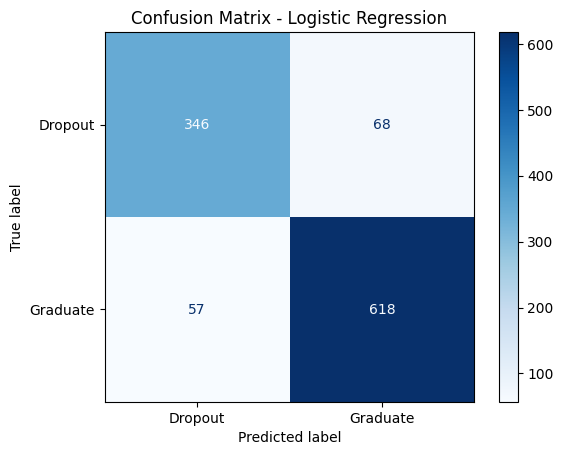


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.86      | 0.84   | 0.85     |
    | Graduate   | 0.90      | 0.92   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.876     |            
    --------------------------
    

Training XGBoost...


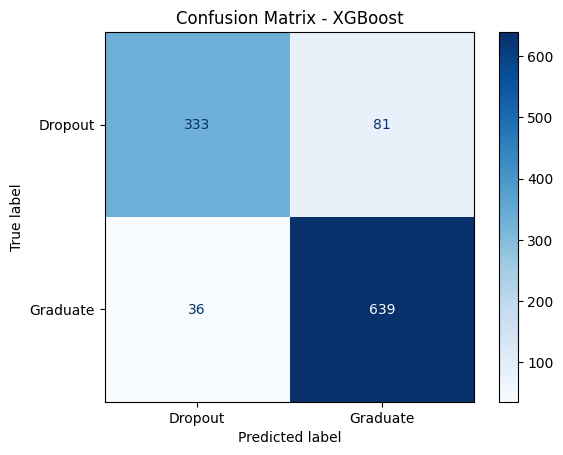


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.90      | 0.80   | 0.85     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.876     |            
    --------------------------
    

Training Support Vector Machine...


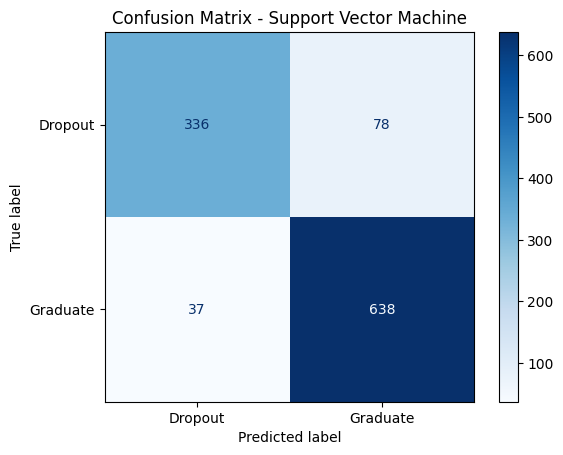


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.90      | 0.81   | 0.85     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.878     |            
    --------------------------
    


In [4]:
# Initialize Models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Support Vector Machine': SVC(class_weight='balanced', probability=True, random_state=42),
}

# Preprocessing
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

# Train and Evaluate Models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(eval_model_generate_markdown(y_test, y_pred, model_name))


Training Stacking Ensemble Model...


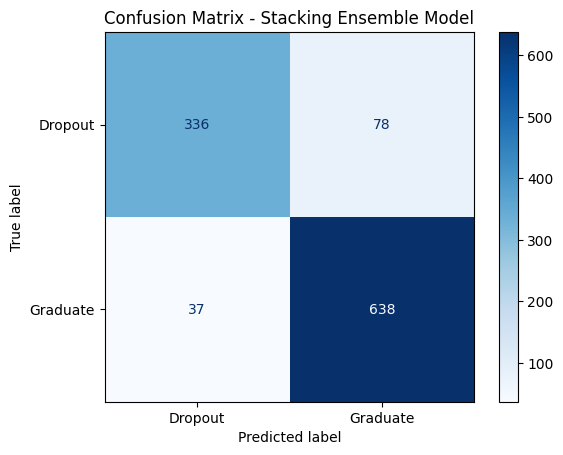


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.90      | 0.81   | 0.85     |
    | Graduate   | 0.89      | 0.95   | 0.92     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.89      |          
    | ROC-AUC    | 0.878     |            
    --------------------------
    


In [6]:
# Ensemble Model: Stacking Classifier
estimators = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced', random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=SVC(probability=True, random_state=42))
model_name = 'Stacking Ensemble Model'
print(f"\nTraining {model_name}...")
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, model_name))